In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_excel("Data Insights - Synthetic Dataset.xlsx")

In [3]:
df_raw

,insurer_id,episode_id,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,AR-DRG,ModeOfSeparation,CareType,...,PharmacyCharge,ProsthesisCharge,OtherCharges,BundledCharges,UnplannedTheatreVisit,InfantWeight,Readmission28Days,HoursMechVentilation,PalliativeCareStatus,Age
0,EAQ,78773,2015-03-24,64012,F,2024-07-22,2024-07-29,C63A,Other,Inpatient,...,1.0866012197370352e+111,360.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,YMX,325,1970-01-04,37800,F,2023-10-05,2023-11-03,P05A,Other,Outpatient,...,1.6551196535426248e+72,94.250,55.01,NaN,NaN,NaN,NaN,NaN,NaN,54
2,RQU,44678,2020-01-08,31072,F,2024-02-02,2024-02-08,B03C,Transfer,Emergency,...,5.962186531470867e+83,NaN,NaN,3752.66,NaN,NaN,NaN,NaN,NaN,4
3,QCO,83603,1982-12-28,33340,F,2022-08-02,2022-08-27,B80A,Other,Inpatient,...,NaN,NaN,90.51,NaN,No,NaN,NaN,NaN,NaN,41
4,EAQ,85397,2020-09-23,58698,M,2022-08-30,2022-09-07,DRG002,Transfer,Inpatient,...,2.8708801485514914e+122,387.570,69.16,NaN,NaN,4.14,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCO,91113,1939-08-05,38739,M,2023-05-14,2023-06-07,DRG001,Discharge,Outpatient,...,ERROR,300.170,NaN,3154.38,NaN,NaN,NaN,NaN,NaN,85
29996,EAQ,70980,1941-02-26,68816,F,2023-03-09,2023-04-06,H07C,Discharge,Inpatient,...,NaN,NaN,24.29,NaN,NaN,NaN,NaN,NaN,NaN,83
29997,YMX,27932,1974-12-15,45741,M,2024-02-04,2024-02-13,DRG003,Other,Outpatient,...,9.997242723890052e+61,389.610,55.44,4509.92,NaN,NaN,NaN,NaN,Yes,49
29998,RQU,32928,1954-07-02,72038,M,2023-09-24,2023-09-29,DRG001,Discharge,Outpatient,...,NaN,211.185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70


In [4]:
df_raw.isna().sum()

insurer_id                     0
episode_id                     0
DateOfBirth                    0
Postcode                       0
Sex                            0
AdmissionDate                  0
SeparationDate                 0
AR-DRG                         0
ModeOfSeparation               0
CareType                       0
SourceOfReferral               0
DischargeIntention             0
AdmissionProviderID            0
AdmissionTime                  0
UrgencyOfAdmission             0
SeparationTime                 0
PrincipalDiagnosis             0
Diagnosis2                     0
Diagnosis3                     0
Diagnosis4                     0
Principal_ProcedureCode        0
ProcedureCode2                 0
ProcedureCode3                 0
AccommodationCharge            0
CCU_Charges                17167
ICU_Charge                 17138
TheatreCharge              17164
PharmacyCharge             16735
ProsthesisCharge           17151
OtherCharges               17181
BundledCha

In [5]:
df_raw.dtypes

insurer_id                         object
episode_id                          int64
DateOfBirth                datetime64[ns]
Postcode                            int64
Sex                                object
AdmissionDate              datetime64[ns]
SeparationDate             datetime64[ns]
AR-DRG                             object
ModeOfSeparation                   object
CareType                           object
SourceOfReferral                   object
DischargeIntention                 object
AdmissionProviderID                 int64
AdmissionTime                      object
UrgencyOfAdmission                 object
SeparationTime                     object
PrincipalDiagnosis                 object
Diagnosis2                         object
Diagnosis3                         object
Diagnosis4                         object
Principal_ProcedureCode            object
ProcedureCode2                     object
ProcedureCode3                     object
AccommodationCharge               

# Part 1: Data Exploration and Preparation

In [6]:
df_clean = df_raw.copy()

In [7]:
df_clean['PharmacyCharge'] = df_clean['PharmacyCharge'].apply(lambda x: 0 if x == 'ERROR' else x)

In [8]:
df_clean['PharmacyCharge'] = df_clean['PharmacyCharge'].fillna(0).astype('float')

In [9]:
for i in range(len(df_clean['PharmacyCharge'])):
    temp = ("%.5f" % df_clean['PharmacyCharge'][i]).rstrip('0').rstrip('.')
    df_clean['PharmacyCharge'][i] = temp[:6]

C:\Users\devan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_clean['AccommodationCharge'] = df_clean['AccommodationCharge'].fillna(0).round(2)
df_clean['CCU_Charges'] = df_clean['CCU_Charges'].fillna(0).round(2)
df_clean['ICU_Charge'] = df_clean['ICU_Charge'].fillna(0).round(2)
df_clean['TheatreCharge'] = df_clean['TheatreCharge'].fillna(0).round(2)
df_clean['PharmacyCharge'] = df_clean['PharmacyCharge'].fillna(0).round(2)
df_clean['ProsthesisCharge'] = df_clean['ProsthesisCharge'].fillna(0).round(2)
df_clean['OtherCharges'] = df_clean['OtherCharges'].fillna(0).round(2)
df_clean['BundledCharges'] = df_clean['BundledCharges'].fillna(0).round(2)
df_clean['HoursMechVentilation'] = df_clean['HoursMechVentilation'].fillna(0).round(2)
df_clean['InfantWeight'] = df_clean['InfantWeight'].fillna(0).round(2)

In [11]:
df_clean.describe()

,episode_id,Postcode,AdmissionProviderID,AccommodationCharge,CCU_Charges,ICU_Charge,TheatreCharge,PharmacyCharge,ProsthesisCharge,OtherCharges,BundledCharges,InfantWeight,HoursMechVentilation,Age
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,50033.716400,50024.200033,5.346018e+06,11.189221,3.569638,4.218407,466.784102,160795.862667,136.192094,48.218338,1171.112147,0.190691,1.795367,50.323600
std,28877.713709,28630.887452,2.808776e+06,3.068058,4.312475,5.158868,637.339069,249616.090536,198.356914,66.087358,1597.777891,0.839481,9.192343,29.217789
min,0.000000,504.000000,5.001550e+05,4.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25133.750000,25599.750000,2.797561e+06,8.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,49877.000000,49760.500000,5.939456e+06,10.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,75086.750000,74689.750000,7.568241e+06,13.320000,7.240000,8.590000,935.985000,245808.000000,267.037500,97.420000,2335.385000,0.000000,0.000000,76.000000
max,99997.000000,99947.000000,9.924619e+06,33.940000,17.560000,29.960000,1999.900000,999862.000000,5391.750000,239.960000,4999.670000,5.000000,72.000000,101.000000


In [12]:
df_clean['UnplannedTheatreVisit'] = df_clean['UnplannedTheatreVisit'].fillna('No')
df_clean['Readmission28Days'] = df_clean['Readmission28Days'].fillna('No')
df_clean['PalliativeCareStatus'] = df_clean['PalliativeCareStatus'].fillna('No')

In [13]:
df_clean['AR-DRG'] = df_clean['AR-DRG'].apply(lambda x: 'DRGX' if len(x) > 4 else x)

In [14]:
df_clean = df_clean[df_clean['AR-DRG'] != 'DRGX']

In [15]:
df_clean['_Cal_AGE'] = df_clean['AdmissionDate'].dt.year - df_clean['DateOfBirth'].dt.year

In [16]:
df_clean['_CalenderYear'] = df_clean['AdmissionDate'].dt.year

In [17]:
df_clean['_Age_Diff'] = abs(df_clean['Age'] - df_clean['_Cal_AGE'])

In [18]:
filtered_df = df_clean[(df_clean['_Age_Diff'] > 1)]
print("No of episodes with age difference more than 1: ", len(filtered_df))
filtered_df = df_clean[(df_clean['_Age_Diff'] > 2)]
print("No of episodes with age difference more than 2: ", len(filtered_df))

No of episodes with age difference more than 1:  2411
No of episodes with age difference more than 2:  0


In [19]:
df_clean['_LOS'] = (df_clean['SeparationDate'] - df_clean['AdmissionDate'])
df_clean['_LOS'] = df_clean['_LOS'].dt.days

# Creating Features

In [20]:
df_clean['_TotalCharge'] = (
                            df_clean['AccommodationCharge'] +
                            df_clean['CCU_Charges'] +
                            df_clean['ICU_Charge'] + 
                            df_clean['TheatreCharge'] +  
                            #df_clean['PharmacyCharge'] +
                            df_clean['ProsthesisCharge'] +
                            df_clean['OtherCharges'] +
                            df_clean['BundledCharges']
                            )

In [21]:
df_clean['_RevenuePerDay'] = round(df_clean['_TotalCharge'] / df_clean['_LOS'], 2)

In [22]:
df_clean['_IsICU'] = df_clean['ICU_Charge'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
df_clean['_IsCCU'] = df_clean['CCU_Charges'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
df_clean['_IsSurgical'] = df_clean['TheatreCharge'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
df_clean['_IsOvernight'] = df_clean['_LOS'].apply(lambda x: 1 if x > 1 else 0)

In [26]:
df_clean.iloc[:,-20:]

,PharmacyCharge,ProsthesisCharge,OtherCharges,BundledCharges,UnplannedTheatreVisit,InfantWeight,Readmission28Days,HoursMechVentilation,PalliativeCareStatus,Age,_Cal_AGE,_CalenderYear,_Age_Diff,_LOS,_TotalCharge,_RevenuePerDay,_IsICU,_IsCCU,_IsSurgical,_IsOvernight
0,108660.0,360.69,0.00,0.00,No,0.0,No,0.0,No,9,9,2024,0,7,1798.01,256.86,1,1,1,1
1,165511.0,94.25,55.01,0.00,No,0.0,No,0.0,No,54,53,2023,1,29,386.75,13.34,0,0,1,1
2,596218.0,0.00,0.00,3752.66,No,0.0,No,0.0,No,4,4,2024,0,6,3761.00,626.83,0,0,0,1
3,0.0,0.00,90.51,0.00,No,0.0,No,0.0,No,41,40,2022,1,25,105.12,4.20,0,0,0,1
6,224520.0,464.79,74.69,0.00,No,0.0,No,0.0,No,57,57,2023,0,25,1346.88,53.88,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0.0,340.25,0.00,0.00,No,0.0,No,0.0,No,91,90,2023,1,11,348.29,31.66,0,0,0,1
29993,671736.0,177.90,131.45,0.00,No,0.0,No,0.0,No,99,99,2024,0,23,346.76,15.08,1,1,0,1
29994,0.0,0.00,0.00,3630.17,No,0.0,No,0.0,No,100,99,2023,1,11,3638.30,330.75,0,0,0,1
29996,0.0,0.00,24.29,0.00,No,0.0,No,0.0,No,83,82,2023,1,28,48.94,1.75,1,0,0,1


# Part 2: Data Analysis and Visualisation

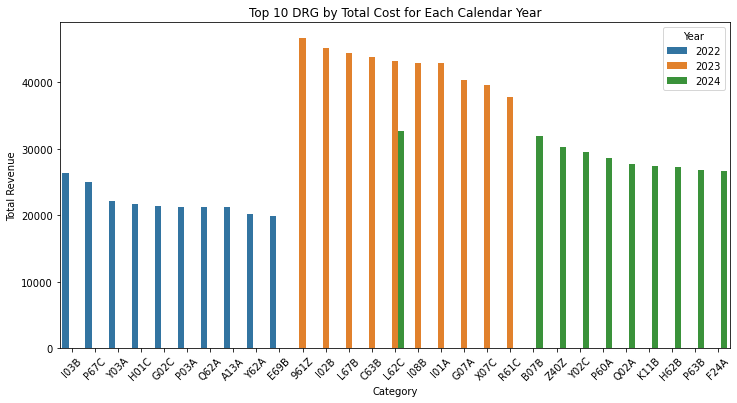

In [34]:
# Group by year and category, then sum total_cost
df_grouped = df_clean.groupby(['_CalenderYear', 'AR-DRG'])['_TotalCharge'].sum().reset_index()

# Get top 10 categories by total_cost for each year
top_categories = df_grouped.sort_values(['_CalenderYear', '_TotalCharge'], ascending=[True, False])
top_10 = top_categories.groupby('_CalenderYear').head(10)

plt.figure(figsize=(12, 6))

# Apply the color palette
sns.color_palette("tab10")

# Plot with vertical bars (default bar plot orientation)
sns.barplot(x='AR-DRG', y='_TotalCharge', hue='_CalenderYear', data=top_10)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 DRG by Total Cost for Each Calendar Year')
plt.legend(title='Year')

plt.xticks(rotation=45)  # Rotate category labels if needed for better readability

plt.show()
           
           
           



# # Plotting
# plt.figure(figsize=(12, 6))
# sns.barplot(x='total_cost', y='col_cat', hue='year', data=top_10, palette='Blues_d')
# plt.xlabel('Total Cost')
# plt.ylabel('Category')
# plt.title('Top 10 Categories by Total Cost for Each Calendar Year')
# plt.legend(title='Year')
# plt.show()



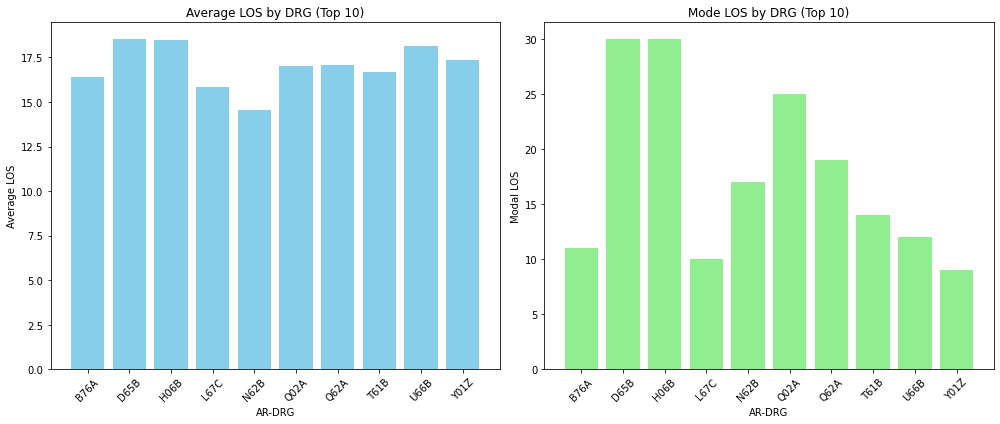

In [35]:

df_mean = df_clean.groupby('AR-DRG')['_LOS'].mean().reset_index()


df_mode = df_clean.groupby('AR-DRG')['_LOS'].apply(lambda x: x.mode()[0]).reset_index()


top_10_categories = df_clean.groupby('AR-DRG')['_LOS'].sum().nlargest(10).index


df_mean_top10 = df_mean[df_mean['AR-DRG'].isin(top_10_categories)]
df_mode_top10 = df_mode[df_mode['AR-DRG'].isin(top_10_categories)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.bar(df_mean_top10['AR-DRG'], df_mean_top10['_LOS'], color='skyblue')
ax1.set_title('Average LOS by DRG (Top 10)')
ax1.set_xlabel('AR-DRG')
ax1.set_ylabel('Average LOS')
ax1.set_xticklabels(df_mean_top10['AR-DRG'], rotation=45)


ax2.bar(df_mode_top10['AR-DRG'], df_mode_top10['_LOS'], color='lightgreen')
ax2.set_title('Mode LOS by DRG (Top 10)')
ax2.set_xlabel('AR-DRG')
ax2.set_ylabel('Modal LOS')
ax2.set_xticklabels(df_mode_top10['AR-DRG'], rotation=45)

plt.tight_layout()
plt.show()

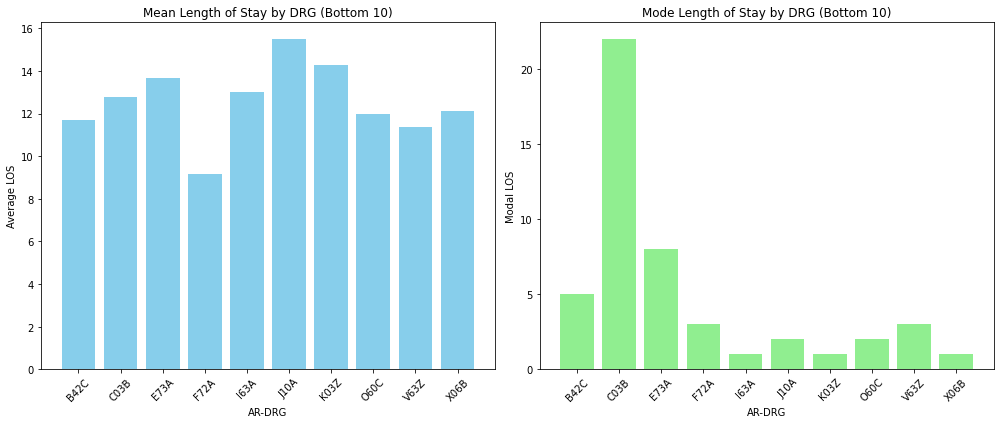

In [36]:
df_mean = df_clean.groupby('AR-DRG')['_LOS'].mean().reset_index()

df_mode = df_clean.groupby('AR-DRG')['_LOS'].apply(lambda x: x.mode()[0]).reset_index()

bottom_10_categories = df_clean.groupby('AR-DRG')['_LOS'].sum().nsmallest(10).index

df_mean_bottom10 = df_mean[df_mean['AR-DRG'].isin(bottom_10_categories)]
df_mode_bottom10 = df_mode[df_mode['AR-DRG'].isin(bottom_10_categories)]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(df_mean_bottom10['AR-DRG'], df_mean_bottom10['_LOS'], color='skyblue')
ax1.set_title('Mean Length of Stay by DRG (Bottom 10)')
ax1.set_xlabel('AR-DRG')
ax1.set_ylabel('Average LOS')
ax1.set_xticklabels(df_mean_bottom10['AR-DRG'], rotation=45)

ax2.bar(df_mode_bottom10['AR-DRG'], df_mode_bottom10['_LOS'], color='lightgreen')
ax2.set_title('Mode Length of Stay by DRG (Bottom 10)')
ax2.set_xlabel('AR-DRG')
ax2.set_ylabel('Modal LOS')
ax2.set_xticklabels(df_mode_bottom10['AR-DRG'], rotation=45)

plt.tight_layout()
plt.show()